In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-19 15:55:00--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-19 15:55:01 (43.7 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [0]:
data=pd.read_csv('moore.csv',header=None).values
x= data[:,0].reshape(-1,1) #make it a 2-d array of size N * D where D=1
y= data[:,1]

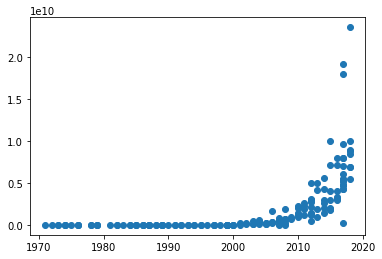

In [0]:
plt.scatter(x,y)

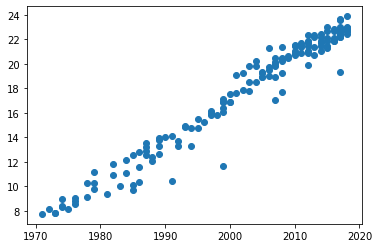

In [0]:
y= np.log(y)
plt.scatter(x,y)

In [0]:
x = x-x.mean()
#preprocessing

In [0]:
#creating tensorflow model
import tensorflow as tf

model= tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
        ])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

#learning rate scheduler
def schedule(epoch,lr):
  if epoch >=50:
    return 0.001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model
r = model.fit(x,y,epochs=200,callbacks=[scheduler])


Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 300.8813 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 394.9570 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 277.2915 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 227.2786 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 198.9086 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 125.8082 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 83.7210 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 80.4457 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 113.3543 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 56.8181 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 

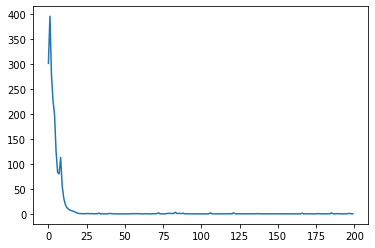

In [0]:
plt.plot(r.history['loss'],label='loss')

In [0]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3539275]], dtype=float32), array([17.733799], dtype=float32)]


In [0]:
a = model.layers[0].get_weights()[0][0,0]

In [0]:
print('Time to Double:',np.log(2)/a)


Time to Double: 1.958444014896333


In [0]:
#Analytical Solution

x= np.array(x).flatten()
y= np.array(y)
denominator= x.dot(x)- x.mean() * x.sum()
a=( x.dot(y) - y.mean() *x.sum() )/denominator
b=( y.mean() * x.dot(x) - x.mean() * x.dot(y) )/denominator
print(a,b)
print("time to double:",np.log(2)/a)

0.341682487387313 17.764939393631764
time to double: 2.0286295205239204


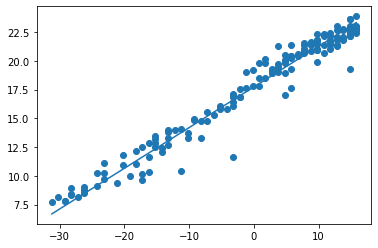

In [0]:
Yhat= model.predict(x).flatten()
plt.scatter(x,y)
plt.plot(x,Yhat)

In [0]:
#Manual Calculation

#get the Weights
w,b = model.layers[0].get_weights()
#Reshaping X as we flattend earlier
x=  x.reshape(-1,1)
#dont use == for floating points
Yhat2= (x.dot(w)+b).flatten()
np.allclose(Yhat,Yhat2)

True